This report is written by TAERAKUL Janat 19B60096

# About the Data

The data I chose to analyze in this final report is an undirected, unweighted network representing the topology of the Western States Power Grid of the United States. The dataset was made by D. Watts and S. Strogatz in 1998. Each node represent a power station in the system and each edge represent a connection between stations. The graph is undirected and unweighted, therefore, therefore the physical distance between stations cannot be represented by this graph. 

I chose this dataset because I wanted to know the natural characteristics of the power grid. I wondered how vulnerable the grid is, is there any weak point in the system and other network related value such as clustering coefficient and average shortest path length. Unlike network of a social network, which each node has high degree, the network of power grid should have average degree of around two (inflow and outflow). I think the average path length of this network would be long and don't expect the small-world effect in the network.

Data source: [Network Data](http://www-personal.umich.edu/~mejn/netdata/)
D. J. Watts and S. H. Strogatz, Nature 393, 440-442 (1998). Download [here](http://www-personal.umich.edu/~mejn/netdata/power.zip)

# Analysis of the Data

## Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import csv
%matplotlib inline
%config IPCompleter.greedy=True

## Read the data from downloaded file

In [2]:
G = nx.read_gml('./Data/power/power.gml', label = 'id')

## Characteristic Values

The network composed of 4941 nodes and 6594 edges. Every node in the network are connected, therefor the number of connected component is 1.

In [3]:
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
num_compo = nx.number_connected_components(G)
print('Number of nodes: {}, Number of edges: {}, Number of connected components: {}'.format(num_nodes, num_edges, num_compo))

Number of nodes: 4941, Number of edges: 6594, Number of connected components: 1


The average degree of the network is 2.67, which is a little higher than 2. There are two ways to find the average degree: by using the handshaking lemma, and by directly finding the mean of degree of each node.

In [4]:
# average_degree = 2*num_edges/num_nodes
average_degree = np.mean([d for n, d in G.degree()])
print("Average Degree:", average_degree)

Average Degree: 2.66909532483303


Then I calculate the degree distribution. There are nodes with degree of 1 to 19. Nodes with degree of 2 is the majority of the network (33.5%). Degree 1 is the second most (24.8%).

In [5]:
degree_seq = sorted([d for n, d in G.degree()], reverse=True)
degree, p_k = np.unique(degree_seq, return_counts=True)
p_k = p_k / num_nodes
print("Degree:", degree)
print("p_k:", p_k)

Degree: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 18 19]
p_k: [2.48127909e-01 3.35154827e-01 2.14531471e-01 8.11576604e-02
 5.10018215e-02 2.77271807e-02 1.70006072e-02 9.30985630e-03
 5.46448087e-03 5.26209269e-03 2.22626999e-03 1.01194090e-03
 1.01194090e-03 6.07164542e-04 2.02388181e-04 2.02388181e-04]


## Degree Distribution

By plotting the degree distribution, we can see the distributon following the power-law. Plotting on logarithmic scale gives a straight line.

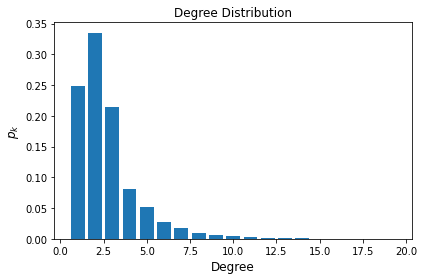

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.bar(degree, p_k)
ax.set_title("Degree Distribution")
ax.set_xlabel("Degree", fontsize=12)
ax.set_ylabel("$p_k$", fontsize=12)
fig.tight_layout()
plt.show()

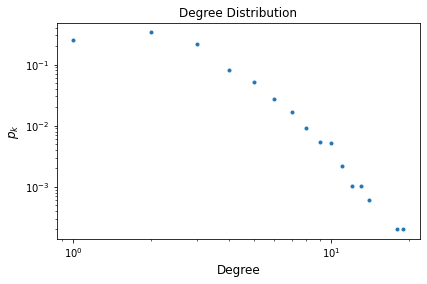

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(degree, p_k, marker=".", linestyle="")
ax.set_title("Degree Distribution")
ax.set_xlabel("Degree", fontsize=12)
ax.set_ylabel("$p_k$", fontsize=12)
fig.tight_layout()
plt.yscale("log")
plt.xscale("log")
plt.show()

The average path length of the network is 18.99, which means that it takes an average of 19 steps to travel from any node to another node. The diameter is the distance of the longest path in the network which is 46.

In [8]:
average_path_length = nx.average_shortest_path_length(G)
print("Average path length:", average_path_length)

Average path length: 18.989185424445708


In [9]:
diameter = nx.diameter(G)
print("Diameter:", diameter)

Diameter: 46


In [10]:
average_clustering_coefficient = nx.average_clustering(G)
print("Average clustering coefficient:", average_clustering_coefficient)
degree_assortativity = nx.degree_assortativity_coefficient(G)
print("Degree Assortativity", degree_assortativity)

Average clustering coefficient: 0.08010361108159711
Degree Assortativity 0.0034569877442048825


## Network Visualisation

Since the network has almost 5000 nodes, the detail of the graph is difficult to be observed through the visualization. However, we can still see the leaf nodes (node with degree 1) at the edge of the figure, which represent the terminal stations of the power grid. Unlike social network, the power grid network has a lot of leaf nodes.

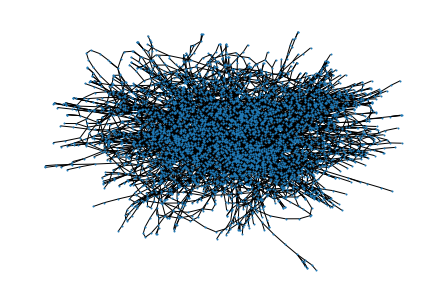

In [11]:
nx.draw(G,pos=nx.spring_layout(G, scale=1), node_size=1)

## Centrality

There are three types of centrality: Degree centrality, Closeness centrality, and Betweenness centrality. 

The node that has the largest degree centrality is the node number 2553. It has the degree of 19, which is the most among nodes in the network.

The node that has the largest closeness centrality is the node number 1308. It has the least total distance to every node in the network

Lastly, the node that has the largest betweenness centrality is the node number 4164. It is the node that appear most in the path between every two nodes in the network.

In [12]:
degree_centrality_dict = nx.degree_centrality(G)

sorted_degree_centrality_dict = sorted(degree_centrality_dict.items(), key=lambda x:x[1], reverse=True)
print(sorted_degree_centrality_dict[:10])
print(list(G.degree())[2553])

[(2553, 0.003846153846153846), (4458, 0.0036437246963562753), (831, 0.0028340080971659917), (3468, 0.0028340080971659917), (4345, 0.0028340080971659917), (2382, 0.002631578947368421), (2542, 0.002631578947368421), (2575, 0.002631578947368421), (2585, 0.002631578947368421), (3895, 0.002631578947368421)]
(2553, 19)


In [13]:
closeness_centrality_dict = nx.closeness_centrality(G)

sorted_closeness_centrality_dict = sorted(closeness_centrality_dict.items(), key=lambda x:x[1], reverse=True)
print(sorted_closeness_centrality_dict[:10])

[(1308, 0.08182330142114155), (2594, 0.0809437981320662), (2605, 0.08035786905246035), (1131, 0.07987194619153098), (2606, 0.0796260477111541), (1243, 0.07932684587468285), (1476, 0.07918570169111165), (2557, 0.07911468426194328), (2528, 0.07877280265339967), (2532, 0.07803121248499399)]


In [14]:
betweenness_centrality_dict = nx.betweenness_centrality(G)

sorted_betweenness_centrality_dict = sorted(betweenness_centrality_dict.items(), key=lambda x:x[1], reverse=True)
print(sorted_betweenness_centrality_dict[:10])

[(4164, 0.28841562147939626), (2543, 0.281698123316245), (1243, 0.2796951897344535), (4219, 0.27764988777849753), (2528, 0.2673044750046778), (1267, 0.24827101665302148), (1308, 0.23651669104994388), (1244, 0.20523301004236533), (426, 0.20495396256691495), (2606, 0.20311626353593557)]


# Discussion

Since the network is unweight, I could not consider the physical distances between stations. If we knew the distances, we might be able to analyze the lost in electric tranfering in the wire and electric pressure drop. The visualized image of the network also too messy to observe the shape of the network because the data is complicated. If possible, I would like to see the network being visualized on a map to see the geographical connection too.

# References
   
   D. J. Watts and S. H. Strogatz, "Collective dynamics of 'small-world' networks", Nature 393, 440-442 (1998).